In [1]:
import os
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt
import functions as fn
import time

In [2]:
# debug dataset
debugFilepath = './data/debug/reviews.tsv'
debugDictFilepath = './data/debug/dict.txt'

# full dataset
trainFilepath = './data/full/train_data.tsv'
valFilepath = './data/full/valid_data.tsv'
testFilepath = './data/full/test_data.tsv'
fullDictFilepath = './data/full/dict.txt' 

# token for bias term
bias = '<BIAS>'

In [3]:
def load_dict(dictFilepath: str):
    token2Index = dict()

    # adding everything from dict.txt
    with open(dictFilepath, 'r') as f:
        for line in f.readlines():
            word, index = line.strip().split(' ')
            token2Index[word] = int(index)

    # adding bias term
    token2Index[bias] = len(token2Index)

    return token2Index

In [4]:
with open(debugFilepath, 'r') as f:
    for line in f.readlines():
        print(line)

1	i had been expecting more of this movie than the less than thrilling twister . twister was good but had no real plot and no one to simpithize with . but twister had amazing effects and i was hoping so would volcano volcano starts with tommy lee jones at emo . he worrys about a small earthquake enough to leave his daughter at home with a baby sitter . there is one small quake then another quake . then a geologist points out to tommy that its takes a geologic event to heat millions of gallons of water in 12 hours . a few hours later large amount of ash start to fall . then . . . . it starts . the volcanic eruption . . . . i liked this movie . . . but it was not as great as i hoped . i was still good none the less . it had excellent special effects . the best view . . . the helecopters flying over the streets of volcanos . also . . . there were interesting side stories that made the plot more interesting . so . . . it was good ! ! 

0	deserves recognition for : achieving the near-imposs

In [5]:
token2IndexDebug = load_dict(debugDictFilepath)
print(token2IndexDebug)

{'i': 0, 'had': 1, 'been': 2, 'expecting': 3, 'more': 4, 'of': 5, 'this': 6, 'movie': 7, 'than': 8, 'the': 9, 'less': 10, 'thrilling': 11, 'twister': 12, 'was': 13, 'good': 14, 'but': 15, 'no': 16, 'real': 17, 'plot': 18, 'and': 19, 'one': 20, 'to': 21, 'simpithize': 22, 'with': 23, 'amazing': 24, 'effects': 25, 'hoping': 26, 'so': 27, 'would': 28, 'volcano': 29, 'starts': 30, 'tommy': 31, 'lee': 32, 'jones': 33, 'at': 34, 'emo': 35, 'he': 36, 'worrys': 37, 'about': 38, 'a': 39, 'small': 40, 'earthquake': 41, 'enough': 42, 'leave': 43, 'his': 44, 'daughter': 45, 'home': 46, 'baby': 47, 'sitter': 48, 'there': 49, 'is': 50, 'quake': 51, 'then': 52, 'another': 53, 'geologist': 54, 'points': 55, 'out': 56, 'that': 57, 'its': 58, 'takes': 59, 'geologic': 60, 'event': 61, 'heat': 62, 'millions': 63, 'gallons': 64, 'water': 65, 'in': 66, '12': 67, 'hours': 68, 'few': 69, 'later': 70, 'large': 71, 'amount': 72, 'ash': 73, 'start': 74, 'fall': 75, 'it': 76, 'volcanic': 77, 'eruption': 78, 'like

In [6]:
ex = np.array(['The dog is an amazing dancer',
             'The dog has an amazing coat'])

In [7]:
cvect = CountVectorizer(binary=True)
dtm = cvect.fit_transform(ex)
dtm = dtm.toarray()
features = cvect.get_feature_names_out()

df = pd.DataFrame(dtm, columns=features)
print(df)

   amazing  an  coat  dancer  dog  has  is  the
0        1   1     0       1    1    0   1    1
1        1   1     1       0    1    1   0    1


In [8]:
trainData = pd.read_csv(trainFilepath, sep = '\t', header = None)
valData = pd.read_csv(valFilepath, sep = '\t', header = None)
testData = pd.read_csv(testFilepath, sep = '\t', header = None)

In [9]:
cvect = CountVectorizer(binary = True, max_features=10000)
xTrain = cvect.fit_transform(trainData.iloc[:, 1])
yTrain = trainData.iloc[:, 0].values.reshape(-1, 1)
xVal = cvect.transform(valData.iloc[:, 1])
yVal = valData.iloc[:, 0].values.reshape(-1, 1)
xTest = cvect.transform(testData.iloc[:, 1])
yTest = testData.iloc[:, 0].values.reshape(-1, 1)

In [10]:
print('First Review Encoded:')
print(yTrain.shape)

First Review Encoded:
(1200, 1)


Start training...finished!
The best parameters are found at epoch 6, with train nll = 0.0567, val nll = 0.3168, train error_rate = 0.0000, best val error_rate = 0.1350, test error_rate = 0.1575
Total time = 32.2533s


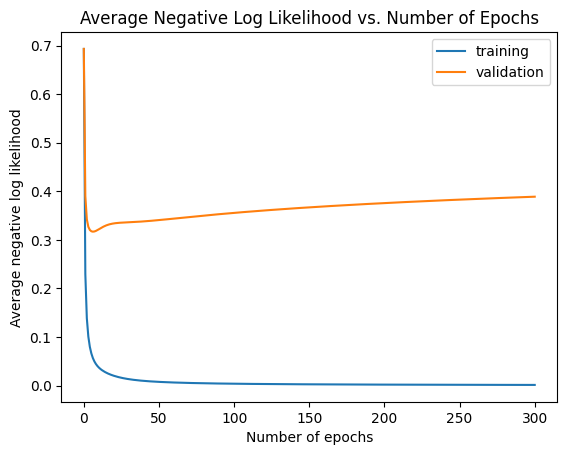

In [11]:
#setting up the experimental parameters
numFeatures = xTrain.shape[1]
numEpochs = 300
lr = 0.01

xTrain = xTrain.toarray()
xVal = xVal.toarray()
xTest = xTest.toarray()

# training and validation
print('Start training...', end='')
start = time.time()
output = fn.train_evaluate_model(xTrain, yTrain, xVal, yVal, numEpochs, lr, visualize_nlls=True)
end = time.time()
print('finished!')

# finally testing
yHatTest = fn.predict(xTest, output['best_theta'])
testError = fn.error_rate(yTest, yHatTest)

# print outputs
print('The best parameters are found at epoch %d, with train nll = %0.4f, val nll = %0.4f, \
train error_rate = %0.4f, best val error_rate = %0.4f, test error_rate = %0.4f' % (output['best_epoch'], output['best_train_nll'], \
output['best_val_nll'], output['train_error'], output['val_error'], testError))
print('Total time = %0.4fs' % (end-start))

In [12]:
# print out the first review of the test dataset and its corresponding true sentiment
with open(testFilepath, 'r') as f:
    firstLine = f.readlines()[0]
    label, review = firstLine.strip().split('\t')
    print('Review =', review)
    print('True sentiment =', label)

# make prediction. Because predict returns a 2D array, we index to get the element
review = np.array(fn.predict(np.array([xTest[0]]), output['best_theta']))[0, 0]

# output
print('Predicted sentiment =', review)

Review = david spade has a snide , sarcastic sense of humor that works perfectly on the tv sitcom just shoot me . it also served as a good showcase for him when he co-starred , opposite the late chris farley , in tommy boy and black sheep . lost and found marks the comedian's first attempt at going solo in a movie , and it also reveals that when spade doesn't have a reliable back-up system , his brand of humor seems more desperate than one may expect . david spade is not the problem with lost and found . he plays dylan ramsey , the sweet main character , to the best of his abilities . the story revolves around dylan's obsessions with his beautiful new neighbour , lila dubois ( sophie marceau , from braveheart ) , and her terrier named jack . dylan believes that the best way to a woman's heart is through her dog . and so he kidnaps jack , planning to stage a fake rescue , in hope to win lila over . there are three good things about lost and found . the first is spade . the second is sop

In [13]:
# Get predictions for the first 10 test samples
preds = np.array(fn.predict(xTest[:10], output['best_theta']))
trues = yTest[:10].flatten()

print("True\tPredicted")
for t, p in zip(trues, preds.flatten()):
    print(f"{t}\t{p}")

True	Predicted
0	0
0	0
1	1
1	0
1	0
1	1
0	1
0	0
1	1
1	0
